<a href="https://colab.research.google.com/github/akashbhor1356/WA_Fn-UseC_-Telco-Customer-Churn/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

# Convert categorical variables to numerical
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
data = pd.get_dummies(data, drop_first=True)

# Print column names to understand the changes
print(data.columns)

# Display cleaned data
print(data.head())


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF',
       ...
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object', length=7062)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0              0       1           29.85         29.85      0   
1              0      34           56.95       1889.50      0   
2              0       2           53.85        108.15      1   
3              0      45           42.30       1840.75      0   
4              0       2           70.70        151.65      1   

   customerID_000

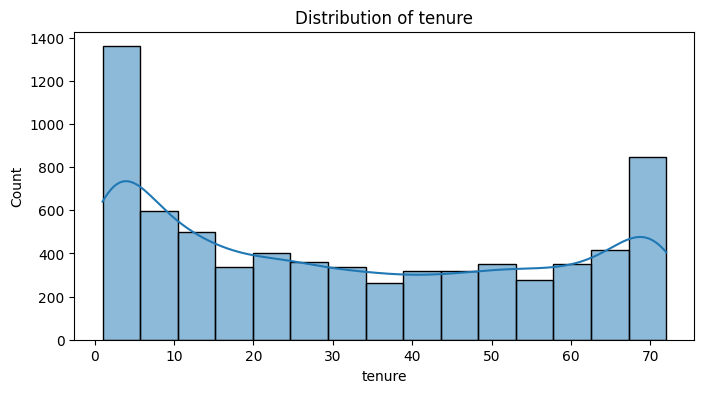

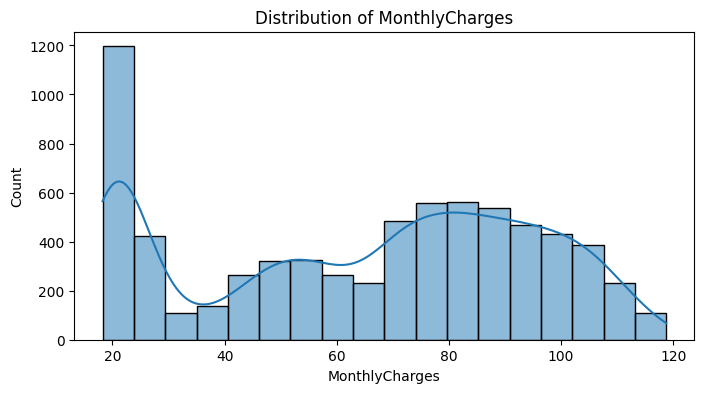

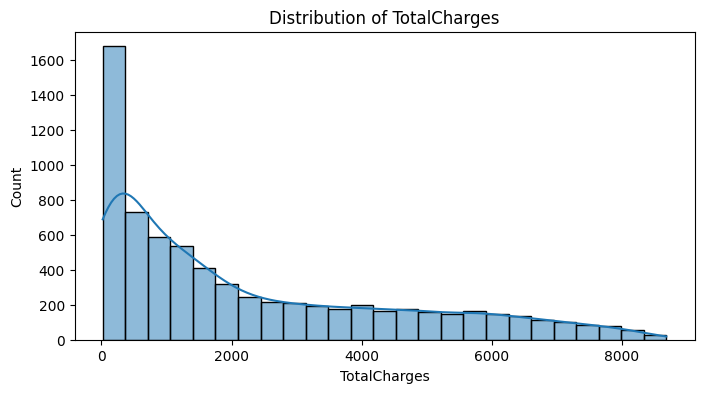

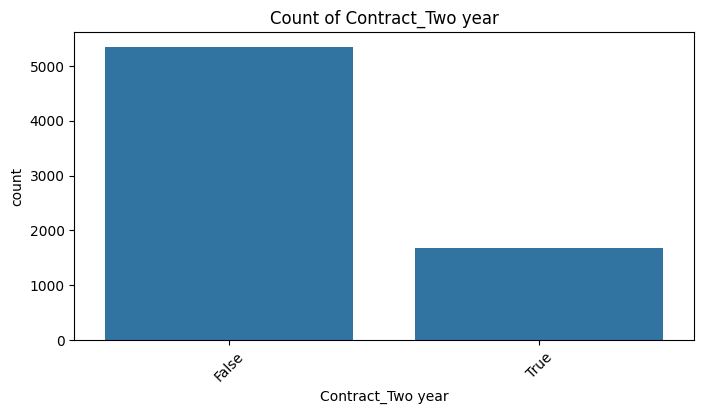

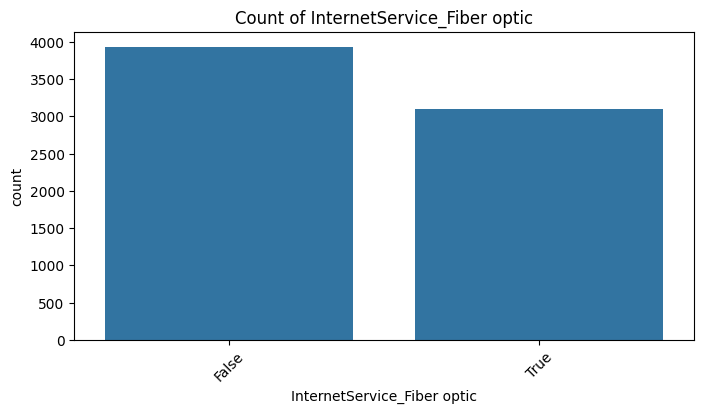

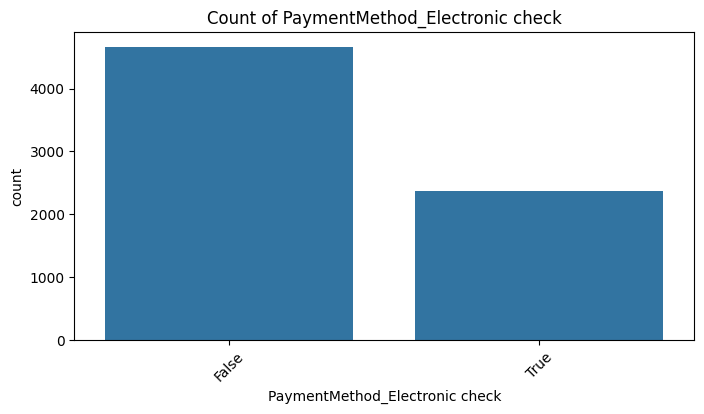

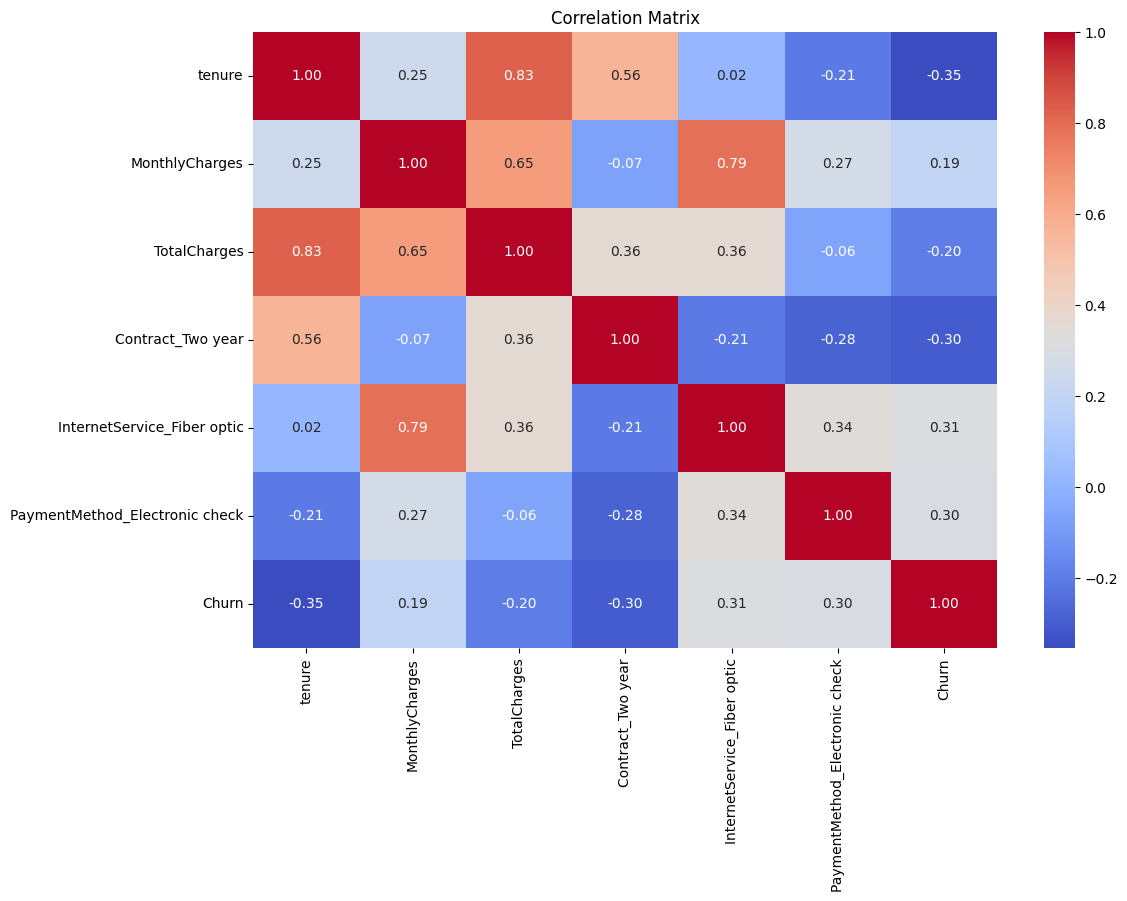

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of selected numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize the count of selected categorical features
# Only selecting a few key categorical features
selected_categorical_features = ['Contract_Two year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']

for feature in selected_categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[feature])
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the correlation matrix of a subset of features
subset_features = numerical_features + selected_categorical_features + ['Churn']

plt.figure(figsize=(12, 8))
corr = data[subset_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Accuracy: 0.7896233120113717
ROC-AUC: 0.8196921380538487


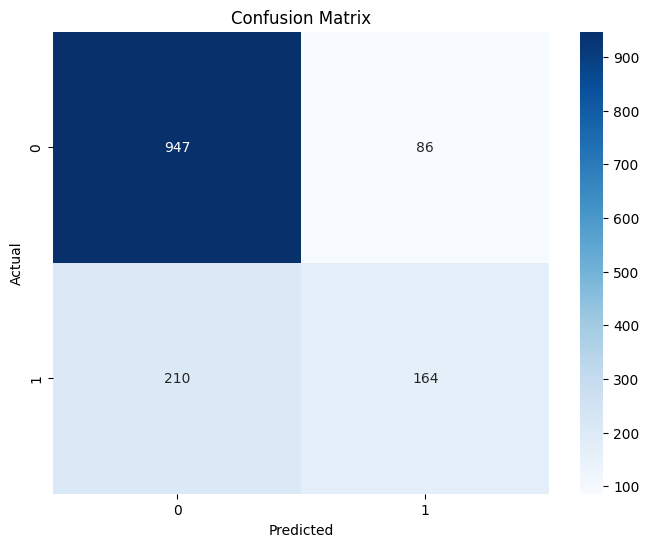

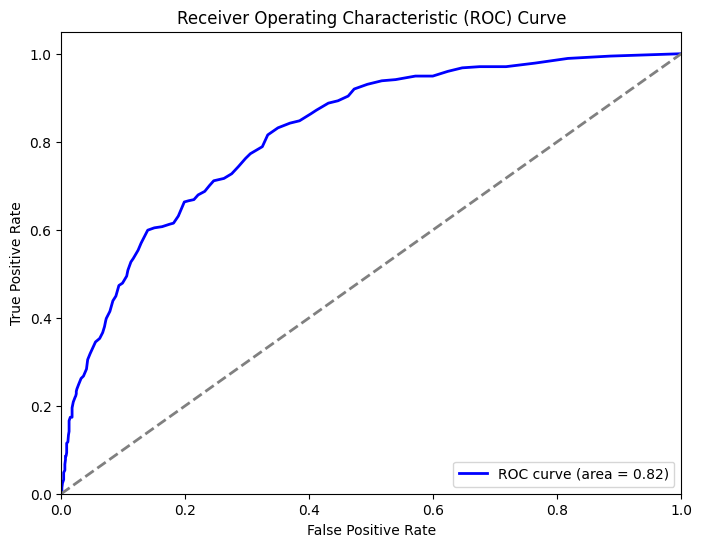

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Check for the presence of 'customerID' column
if 'customerID' in data.columns:
    X = data.drop(columns=['customerID', 'Churn'])
else:
    X = data.drop(columns=['Churn'])

y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [9]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [6]:
# Save the trained model
import joblib
joblib.dump(model, 'churn_model.pkl')

# Create a Flask app
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the model
model = joblib.load('churn_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
